# DSA Bank Marketing Data Set

## In this document, I cleaned, explored, and modeled Data, with following steps:
### 1. Reading Dataset and changing subscription decision to a numeric variable (encoding the target variable)
### 2. Exploring Data and removing outliers
### 3. Balancing data (%50-%50) based on target variable (undersampling with MaxMinScaler)
### 4. Changing categories to numeric columns (encoding categorical variables with getdummies function, removing one category from impacted columns)
### 5. Splitting data to training and test sets and rescaling (originally nomeric) features (Normalization)
### 6. Feature Selection (feature importance coefficient of logistic regression)
### 7. Models (Logistic Regression, Random Forest)
### 8. Conclusions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import os 

### 1. Reading Dataset

In [4]:
# ### DIRECTORY ####
Directory = input("Enter your Directory") #"/Users/zohrehmovahedmanesh/Desktop/DSA"
print(Directory)
os.chdir(Directory)

df=pd.read_csv("DSA Data Set.csv")
df.info()

Enter your Directory/Users/zohrehmovahedmanesh/Desktop/DSA
/Users/zohrehmovahedmanesh/Desktop/DSA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.va

##### 1. Dataset was reviewed in excel for missing values of any forms.  
After review, there are some missing values in categorical data labeled as "unknown".
##### 2. Definition of some attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous:  number of contacts performed before this campaign and for this client (numeric)
* **duration: last contact duration**, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* contact: contact communication type (categorical: 'cellular','telephone')

I am assuming contact type does not change within a campaign and is the type of contact in the current (last) campaign.

### Changing subscribtion decision to a numeric variable

In [5]:
df['y'] = df['y'].replace({"no":0, "yes":1})

In [6]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [7]:
ir=round(100*df['y'].sum()/df.shape[0],2)
print("the imbalance ratio is %{}".format(ir))

the imbalance ratio is %11.27


### 2. Exploring Data and removing outlier from each variable

<AxesSubplot:xlabel='age', ylabel='Count'>

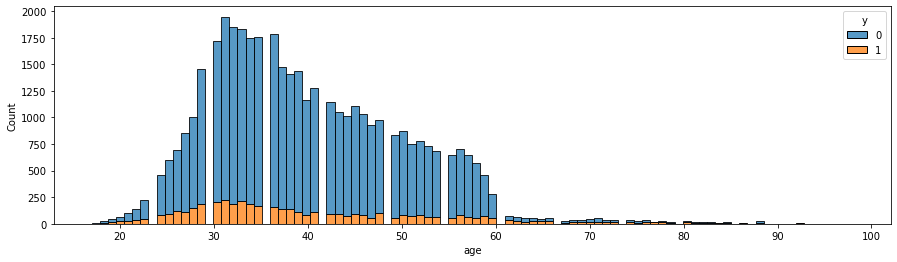

In [8]:
plt.figure(figsize=(15,4))
sns.histplot(data=df, x="age", hue='y', multiple='stack')

This graph shows:
1. Most YES to subscriptions are for ages 28-38
2. Most of the data is distributed between age 17 and 80. (Therefore, I am testing removing of age > 80, by compareing the imbalance ratios before and after outlier removal. If change in the ratio is less that %0.5, will implement the outlier removal.) 


In [8]:
indices = df[df['age'] > 60].index
ds = df.drop(indices)
print("the imbalance ratio change is %{}".format(round(ir-(100*ds['y'].sum()/ds.shape[0]),2)))

the imbalance ratio change is %0.78


which is greater than %.5

In [9]:
indices = df[df['age'] > 80].index
ds = df.drop(indices)
print("the imbalance ratio is %{}".format(round(ir-(100*ds['y'].sum()/ds.shape[0]),2)))

the imbalance ratio is %0.12


which is less than %.5. Therefore, removing age > 80, the outlier, will not impact the distribution of target variable.

In [10]:
df=ds
df['age'].max()

80

In [11]:
df['age'].min()

17

<AxesSubplot:xlabel='age', ylabel='Percent of YES to subscription'>

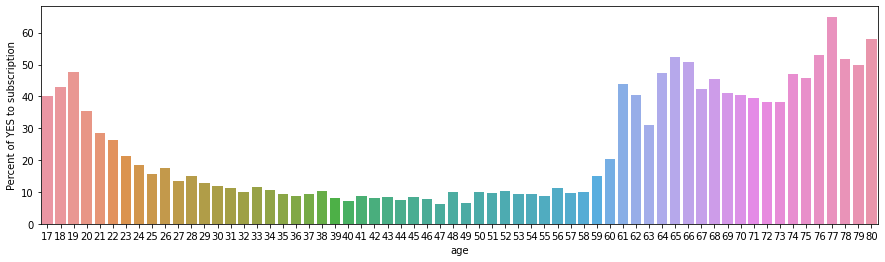

In [19]:
df_age= pd.DataFrame([df['age'],df['y']]).T
total_age=df_age.groupby(['age']).sum()
count_age=df_age.groupby(['age']).count()
count_age=count_age.rename(columns={'y':'count'})
df_age=pd.concat([total_age,count_age], axis=1)
df_age['age']=df_age.index
df_age['Percent of YES to subscription']=100*df_age['y']/df_age['count']
plt.figure(figsize=(15,4))
sns.barplot(x='age', y="Percent of YES to subscription", data=df_age)

<AxesSubplot:xlabel='education', ylabel='Percent of YES to subscription'>

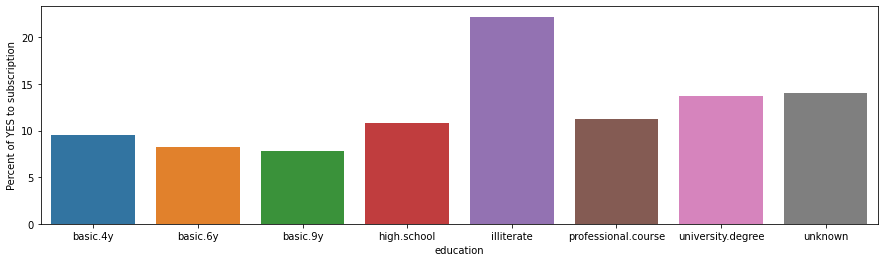

In [20]:
df_education= pd.DataFrame([df['education'],df['y']]).T
total_education=df_education.groupby(['education']).sum()
count_education=df_education.groupby(['education']).count()
count_education=count_education.rename(columns={'y':'count'})
df_education=pd.concat([total_education,count_education], axis=1)
df_education['education']=df_education.index
df_education['Percent of YES to subscription']=100*df_education['y']/df_education['count']
plt.figure(figsize=(15,4))
sns.barplot(x='education', y="Percent of YES to subscription", data=df_education)

<AxesSubplot:xlabel='job', ylabel='Percent of YES to subscription'>

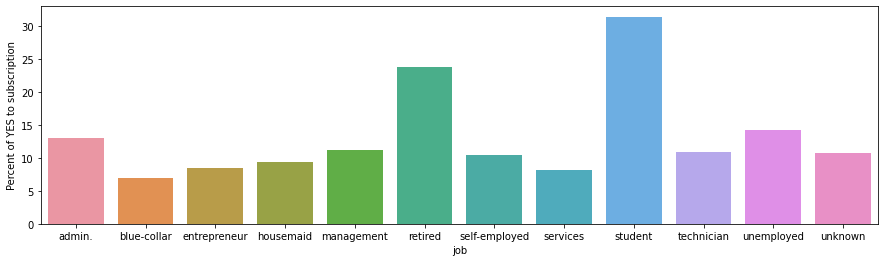

In [21]:
df_job= pd.DataFrame([df['job'],df['y']]).T
total_job=df_job.groupby(['job']).sum()
count_job=df_job.groupby(['job']).count()
count_job=count_job.rename(columns={'y':'count'})
df_job=pd.concat([total_job,count_job], axis=1)
df_job['job']=df_job.index
df_job['Percent of YES to subscription']=100*df_job['y']/df_job['count']
plt.figure(figsize=(15,4))
sns.barplot(x='job', y="Percent of YES to subscription", data=df_job)

<AxesSubplot:xlabel='marital', ylabel='Percent of YES to subscription'>

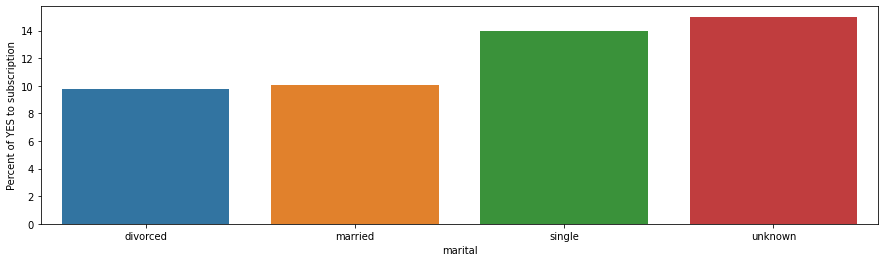

In [22]:
df_marital= pd.DataFrame([df['marital'],df['y']]).T
total_marital=df_marital.groupby(['marital']).sum()
count_marital=df_marital.groupby(['marital']).count()
count_marital=count_marital.rename(columns={'y':'count'})
df_marital=pd.concat([total_marital,count_marital], axis=1)
df_marital['marital']=df_marital.index
df_marital['Percent of YES to subscription']=100*df_marital['y']/df_marital['count']
plt.figure(figsize=(15,4))
sns.barplot(x='marital', y="Percent of YES to subscription", data=df_marital)

<AxesSubplot:xlabel='default', ylabel='Percent of YES to subscription'>

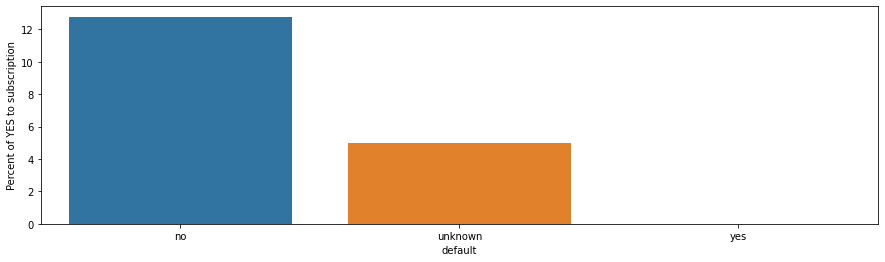

In [23]:
df_default= pd.DataFrame([df['default'],df['y']]).T
total_default=df_default.groupby(['default']).sum()
count_default=df_default.groupby(['default']).count()
count_default=count_default.rename(columns={'y':'count'})
df_default=pd.concat([total_default,count_default], axis=1)
df_default['default']=df_default.index
df_default['Percent of YES to subscription']=100*df_default['y']/df_default['count']
plt.figure(figsize=(15,4))
sns.barplot(x='default', y="Percent of YES to subscription", data=df_default)

<AxesSubplot:xlabel='housing', ylabel='Percent of YES to subscription'>

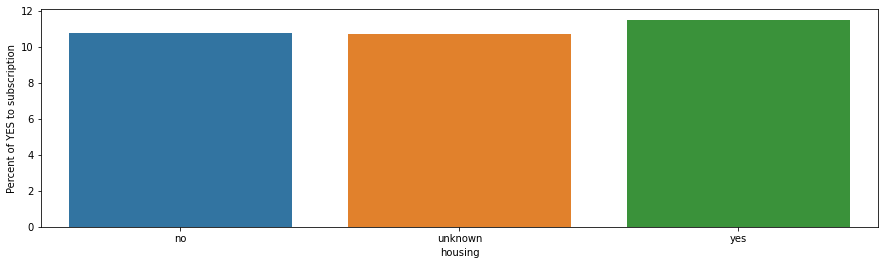

In [24]:
df_housing= pd.DataFrame([df['housing'],df['y']]).T
total_housing=df_housing.groupby(['housing']).sum()
count_housing=df_housing.groupby(['housing']).count()
count_housing=count_housing.rename(columns={'y':'count'})
df_housing=pd.concat([total_housing,count_housing], axis=1)
df_housing['housing']=df_housing.index
df_housing['Percent of YES to subscription']=100*df_housing['y']/df_housing['count']
plt.figure(figsize=(15,4))
sns.barplot(x='housing', y="Percent of YES to subscription", data=df_housing)

<AxesSubplot:xlabel='loan', ylabel='Percent of YES to subscription'>

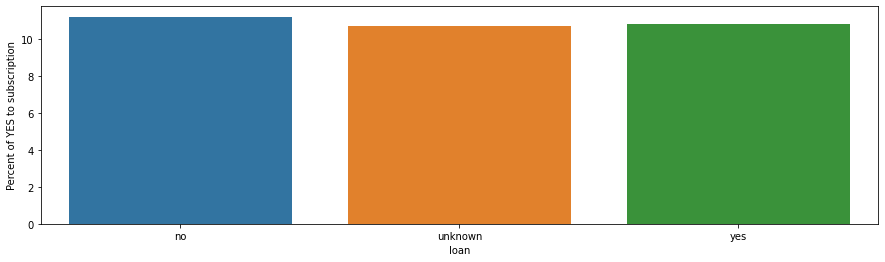

In [25]:
df_loan= pd.DataFrame([df['loan'],df['y']]).T
total_loan=df_loan.groupby(['loan']).sum()
count_loan=df_loan.groupby(['loan']).count()
count_loan=count_loan.rename(columns={'y':'count'})
df_loan=pd.concat([total_loan,count_loan], axis=1)
df_loan['loan']=df_loan.index
df_loan['Percent of YES to subscription']=100*df_loan['y']/df_loan['count']
plt.figure(figsize=(15,4))
sns.barplot(x='loan', y="Percent of YES to subscription", data=df_loan)

<AxesSubplot:xlabel='month', ylabel='Percent of YES to subscription'>

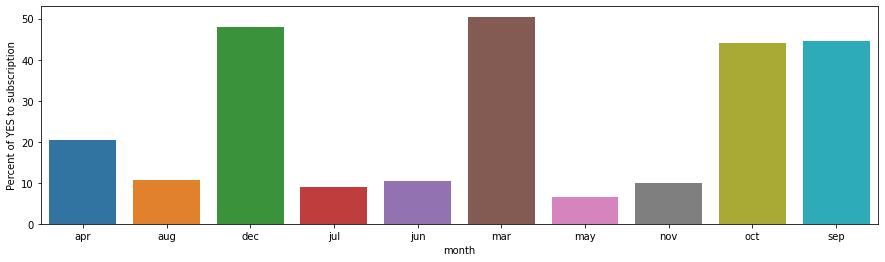

In [26]:
df_month= pd.DataFrame([df['month'],df['y']]).T
total_month=df_month.groupby(['month']).sum()
count_month=df_month.groupby(['month']).count()
count_month=count_month.rename(columns={'y':'count'})
df_month=pd.concat([total_month,count_month], axis=1)
df_month['month']=df_month.index
df_month['Percent of YES to subscription']=100*df_month['y']/df_month['count']
plt.figure(figsize=(15,4))
sns.barplot(x='month', y="Percent of YES to subscription", data=df_month)

<AxesSubplot:xlabel='pdays', ylabel='Percent of YES to subscription'>

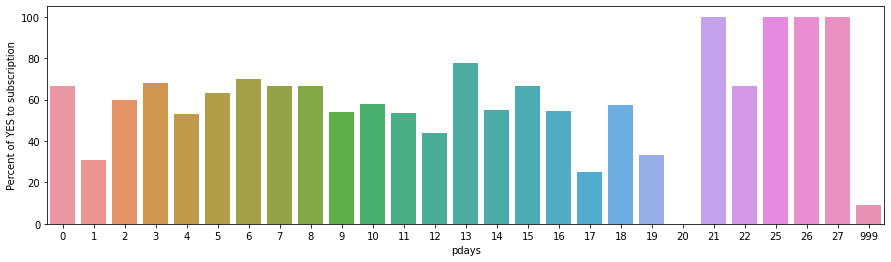

In [27]:
df_pdays= pd.DataFrame([df['pdays'],df['y']]).T
total_pdays=df_pdays.groupby(['pdays']).sum()
count_pdays=df_pdays.groupby(['pdays']).count()
count_pdays=count_pdays.rename(columns={'y':'count'})
df_pdays=pd.concat([total_pdays,count_pdays], axis=1)
df_pdays['pdays']=df_pdays.index
df_pdays['Percent of YES to subscription']=100*df_pdays['y']/df_pdays['count']
plt.figure(figsize=(15,4))
sns.barplot(x='pdays', y="Percent of YES to subscription", data=df_pdays)

<AxesSubplot:xlabel='poutcome', ylabel='Percent of YES to subscription'>

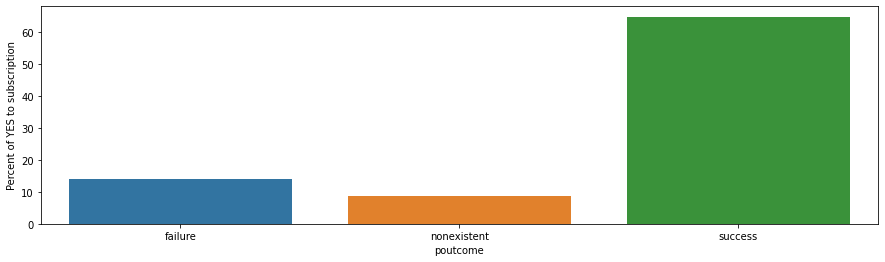

In [28]:
df_poutcome= pd.DataFrame([df['poutcome'],df['y']]).T
total_poutcome=df_poutcome.groupby(['poutcome']).sum()
count_poutcome=df_poutcome.groupby(['poutcome']).count()
count_poutcome=count_poutcome.rename(columns={'y':'count'})
df_poutcome=pd.concat([total_poutcome,count_poutcome], axis=1)
df_poutcome['poutcome']=df_poutcome.index
df_poutcome['Percent of YES to subscription']=100*df_poutcome['y']/df_poutcome['count']
plt.figure(figsize=(15,4))
sns.barplot(x='poutcome', y="Percent of YES to subscription", data=df_poutcome)

<AxesSubplot:xlabel='campaign', ylabel='Percent of YES to subscription'>

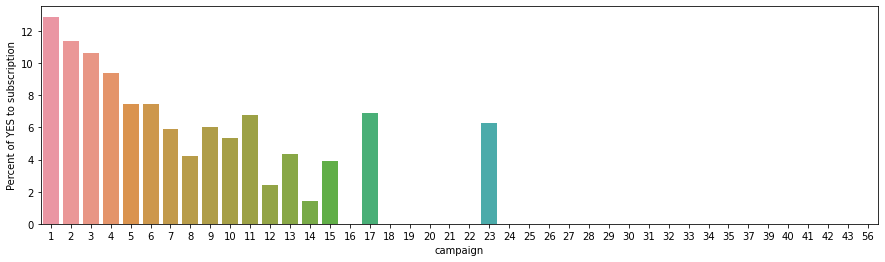

In [29]:
df_campaign= pd.DataFrame([df['campaign'],df['y']]).T
total_campaign=df_campaign.groupby(['campaign']).sum()
count_campaign=df_campaign.groupby(['campaign']).count()
count_campaign=count_campaign.rename(columns={'y':'count'})
df_campaign=pd.concat([total_campaign,count_campaign], axis=1)
df_campaign['campaign']=df_campaign.index
df_campaign['Percent of YES to subscription']=100*df_campaign['y']/df_campaign['count']
plt.figure(figsize=(15,4))
sns.barplot(x='campaign', y="Percent of YES to subscription", data=df_campaign)


Most Yes happens at the first call

<AxesSubplot:xlabel='contact', ylabel='Percent of YES to subscription'>

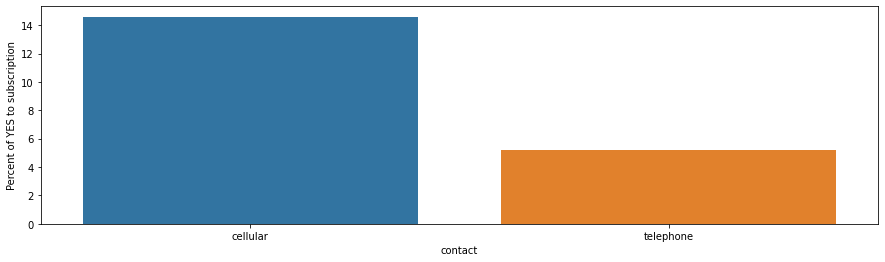

In [31]:
df_contact= pd.DataFrame([df['contact'],df['y']]).T
total_contact=df_contact.groupby(['contact']).sum()
count_contact=df_contact.groupby(['contact']).count()
count_contact=count_contact.rename(columns={'y':'count'})
df_contact=pd.concat([total_contact,count_contact], axis=1)
df_contact['contact']=df_contact.index
df_contact['Percent of YES to subscription']=100*df_contact['y']/df_contact['count']
plt.figure(figsize=(15,4))
sns.barplot(x='contact', y="Percent of YES to subscription", data=df_contact)

<AxesSubplot:xlabel='duration', ylabel='Percent of YES to subscription'>

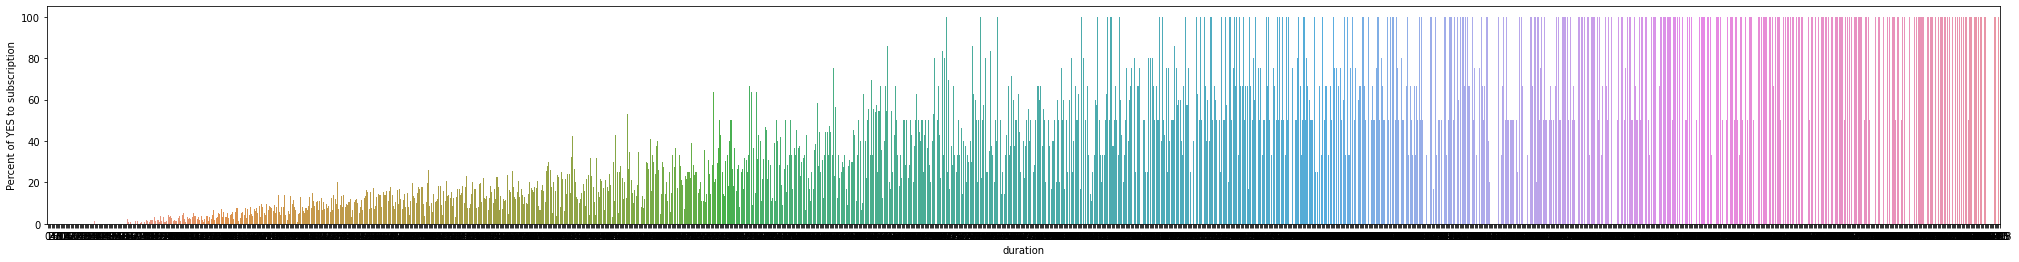

In [40]:
df_duration= pd.DataFrame([df['duration'],df['y']]).T
total_duration=df_duration.groupby(['duration']).sum()
count_duration=df_duration.groupby(['duration']).count()
count_duration=count_duration.rename(columns={'y':'count'})
df_duration=pd.concat([total_duration,count_duration], axis=1)
df_duration['duration']=df_duration.index
df_duration['Percent of YES to subscription']=100*df_duration['y']/df_duration['count']
plt.figure(figsize=(35,4))
sns.barplot(x='duration', y="Percent of YES to subscription", data=df_duration )


<AxesSubplot:xlabel='duration', ylabel='campaign'>

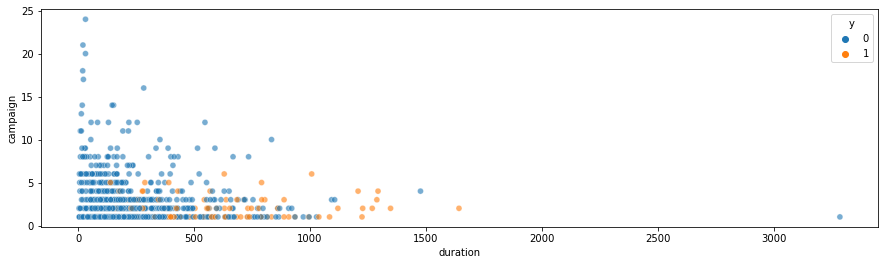

In [43]:
df_sampeled= df.sample(1000)
plt.figure(figsize=(15,4))
sns.scatterplot(data=df_sampeled,x='duration', y='campaign', hue='y', alpha=.6 )


<AxesSubplot:xlabel='euribor3m', ylabel='emp.var.rate'>

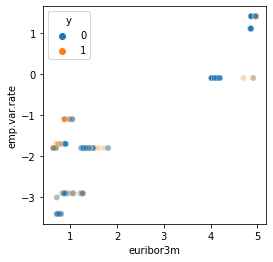

In [57]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df_sampeled,x='euribor3m', y='emp.var.rate', hue='y', alpha=.3 )

<AxesSubplot:xlabel='nr.employed', ylabel='emp.var.rate'>

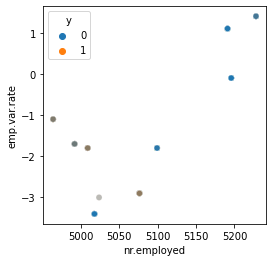

In [56]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df_sampeled,x='nr.employed', y='emp.var.rate', hue='y', alpha=.3 )

<AxesSubplot:xlabel='cons.price.idx', ylabel='emp.var.rate'>

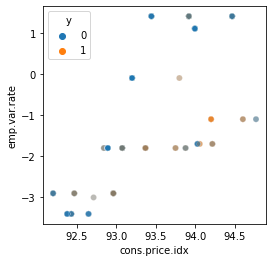

In [55]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df_sampeled,x='cons.price.idx', y='emp.var.rate', hue='y', alpha=.3 )

<AxesSubplot:xlabel='cons.price.idx', ylabel='cons.conf.idx'>

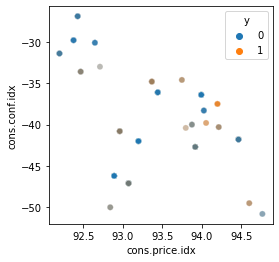

In [54]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df_sampeled,x='cons.price.idx', y='cons.conf.idx', hue='y', alpha=.3 )

Although, social economic factors are related with each other but they dont show a pattern for target variable in graphs.

<AxesSubplot:xlabel='month', ylabel='y'>

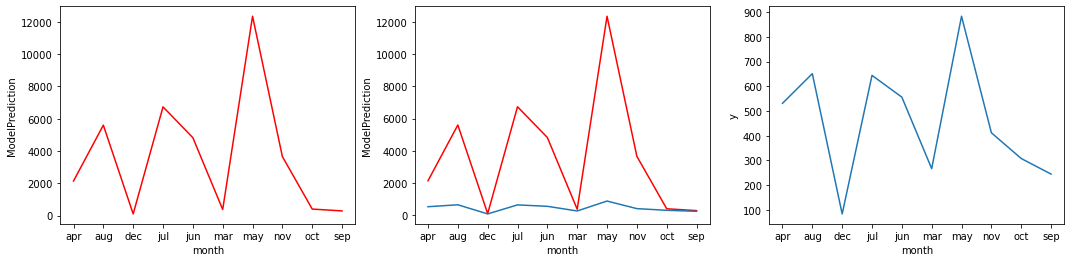

In [108]:
df_prediction=df[['ModelPrediction','y','month']]
df_prediction=df_prediction.groupby(['month']).sum()
df_prediction['month']=df_prediction.index


fig, axs = plt.subplots(ncols=3, figsize=(18,4))
sns.lineplot(x='month', y='ModelPrediction', data=df_prediction , color="red" , ax=axs[0])
sns.lineplot(x='month', y='ModelPrediction', data=df_prediction , color="red" , ax=axs[1])
sns.lineplot(x='month', y='y', data=df_prediction, ax=axs[1])
sns.lineplot(x='month', y='y', data=df_prediction, ax=axs[2])


The Model predicts more subscriber than actualized

In [12]:
df['y'].value_counts()

0    36488
1     4581
Name: y, dtype: int64

### 3. Balancing dataset based on target variable

In [14]:
nonsub = df[df['y'] == 0]
sub = df[df['y'] == 1]
# Undersample the non-subscriber
index = sub.index
sub_count = len(index) 

nonsub_under = nonsub.sample(sub_count)

df = pd.concat([nonsub_under.reset_index(drop = True),
                             sub.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(df['y'].value_counts())


1    4581
0    4581
Name: y, dtype: int64


In [15]:
dfd = df[['duration', 'y']]
print(dfd.groupby(by='y').mean())

     duration
y            
0  219.986684
1  555.776250


In [16]:
print(dfd.groupby(by='y').median())

   duration
y          
0       165
1       452


### 4. Encoding categorical variables to numerical data

In [17]:
df_enc=pd.get_dummies(df)

In [18]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9162 entries, 0 to 4580
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            9162 non-null   int64  
 1   duration                       9162 non-null   int64  
 2   campaign                       9162 non-null   int64  
 3   pdays                          9162 non-null   int64  
 4   previous                       9162 non-null   int64  
 5   emp.var.rate                   9162 non-null   float64
 6   cons.price.idx                 9162 non-null   float64
 7   cons.conf.idx                  9162 non-null   float64
 8   euribor3m                      9162 non-null   float64
 9   nr.employed                    9162 non-null   float64
 10  ModelPrediction                9162 non-null   float64
 11  y                              9162 non-null   int64  
 12  job_admin.                     9162 non-null   u

### 6. Spliting data to training and test sets

In [19]:
col=df_enc.columns
Xcol=col.drop(['ModelPrediction', 'y'])
X=df_enc[Xcol]

In [20]:
y=pd.DataFrame(df_enc['y'])
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9162 entries, 0 to 4580
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       9162 non-null   int64
dtypes: int64(1)
memory usage: 143.2 KB


In [21]:
data=pd.concat([X,y], axis=1)
data.shape

(9162, 63)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3)


In [ ]:
# balance train dataset: validation and test sets must be same distribiution as origoinal 

In [ ]:
#data=pd.concat([X_train, y_train], axis=1)

### 7. Rescaling Data (Normlization)

In [23]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [24]:
X_train_norm

array([[0.25396825, 0.00929457, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.23809524, 0.04671115, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.57142857, 0.05624404, 0.03846154, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.22222222, 0.0300286 , 0.19230769, ..., 0.        , 1.        ,
        0.        ],
       [0.15873016, 0.03145853, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.36507937, 0.01406101, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [34]:
X_train_norm_df=pd.DataFrame(X_train_norm, columns=Xcol)
X_test_norm_df=pd.DataFrame(X_test_norm, columns=Xcol)
X_test_norm_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.476190,0.111296,0.000000,0.004004,0.333333,0.354167,0.711613,0.523013,0.060304,0.105860,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.507937,0.057912,0.038462,1.000000,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.238095,0.074595,0.000000,1.000000,0.000000,1.000000,0.669135,0.338912,0.980050,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.492063,0.022164,0.076923,1.000000,0.166667,0.687500,0.389322,0.368201,0.767853,0.877883,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.301587,0.045996,0.038462,1.000000,0.000000,0.333333,0.269680,0.192469,0.150759,0.512287,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,0.523810,0.092707,0.000000,1.000000,0.000000,0.333333,0.269680,0.192469,0.160961,0.512287,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2745,0.460317,0.161106,0.000000,1.000000,0.000000,0.083333,0.199532,0.744770,0.016323,0.226465,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2746,0.460317,0.003098,0.653846,1.000000,0.000000,1.000000,0.484412,0.615063,0.981183,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2747,0.222222,0.015491,0.000000,1.000000,0.166667,0.687500,0.389322,0.368201,0.797778,0.877883,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
LR0 = LogisticRegression()

# Fit the classifier
LR0.fit(X_train_norm_df, y_train)
coef=pd.DataFrame([Xcol.T, LR0.coef_[0]]).T

/Users/zohrehmovahedmanesh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/zohrehmovahedmanesh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
coef.columns=['feature','coeficient']

In [121]:
coef['absolute']=coef['coeficient'].abs()
coef_rank=coef.sort_values(by=['absolute'],ascending=False)
coef_rank = coef_rank[coef_rank.feature != 'duration']
X_1_col=coef_rank[:20]['feature']

<AxesSubplot:xlabel='feature', ylabel='absolute'>

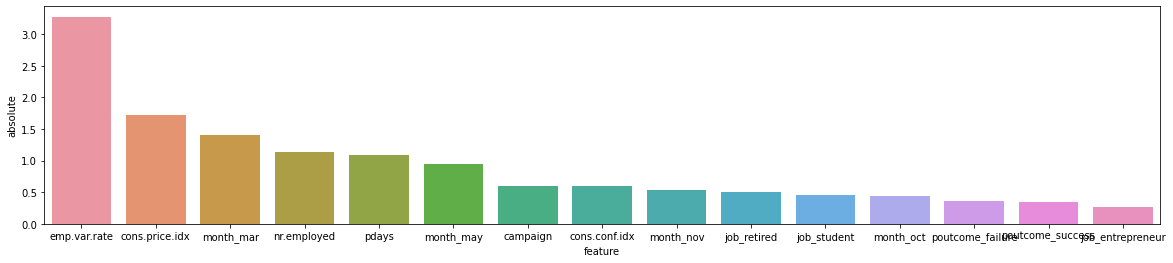

In [141]:
plt.figure(figsize=(20,4))
sns.barplot( x='feature', y='absolute' , data=coef_rank[:15])

In [122]:
X_1_col

5         emp.var.rate
6       cons.price.idx
49           month_mar
9          nr.employed
3                pdays
50           month_may
2             campaign
7        cons.conf.idx
51           month_nov
15         job_retired
18         job_student
52           month_oct
59    poutcome_failure
61    poutcome_success
12    job_entrepreneur
11     job_blue-collar
48           month_jun
4             previous
34          default_no
53           month_sep
Name: feature, dtype: object

In [130]:
LR1 = LogisticRegression()
LR1.fit(X_train_norm_df[X_1_col], y_train)
coef1=pd.DataFrame([X_1_col.T, LR1.coef_[0]]).T
coef1.columns=['feature','coeficient']
#coef1 = coef1[coef1.coeficient != None]
coef1.dropna(inplace=True)

/Users/zohrehmovahedmanesh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,feature,coeficient
5,emp.var.rate,-0.923757
6,cons.price.idx,-1.01216
9,nr.employed,0.445245
3,pdays,-1.39682
2,campaign,0.833287
7,cons.conf.idx,0.36326
15,job_retired,-0.0892206
18,job_student,0.254747
12,job_entrepreneur,-0.411193
11,job_blue-collar,0.0726007


In [134]:
coef1['absolute']=coef1['coeficient'].abs()
coef_rank1=coef1.sort_values(by=['absolute'],ascending=False)
coef_rank1
X_2_col=coef_rank1['feature']

In [142]:
LR2 = LogisticRegression()
LR2.fit(X_train_norm_df[X_2_col], y_train)
coef2=pd.DataFrame([X_2_col.T, LR2.coef_[0]]).T
coef2.columns=['feature','coeficient']
#coef1 = coef1[coef1.coeficient != None]
coef2.dropna(inplace=True)

/Users/zohrehmovahedmanesh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [143]:
coef2

,feature,coeficient
3,pdays,-1.43173
4,previous,-0.85032
6,cons.price.idx,-0.357303
5,emp.var.rate,-1.6233
2,campaign,0.688357
9,nr.employed,0.566427
7,cons.conf.idx,0.414636
